# Import dependencies

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Import census dataset

In [3]:
raw_census_df = pd.read_csv("census_labeled.csv")

In [4]:
raw_census_df.head()

,county name,state,county_population_increased_2015_2016,year,female_total_population,female_age_under_5_pct,female_age_5_to_9_pct,female_age_10_to_14_pct,female_age_15_to_19_pct,female_age_20_to_24_pct,...,male_age_40_to_44_pct,male_age_45_to_49_pct,male_age_50_to_54_pct,male_age_55_to_59_pct,male_age_60_to_64_pct,male_age_65_to_69_pct,male_age_70_to_74_pct,male_age_75_to_79_pct,male_age_80_to_84_pct,male_age_85_and_over_pct
0,Stark County,Ohio,False,2010,192651,5.5,6.3,6.0,6.2,5.7,...,7.0,7.4,8.1,7.4,6.2,4.8,3.1,2.6,2.0,1.5
1,Summit County,Ohio,False,2010,279592,5.6,5.8,6.2,6.5,6.1,...,6.8,7.6,8.1,7.5,5.6,3.6,3.3,2.5,2.0,1.2
2,Trumbull County,Ohio,False,2010,108490,5.4,5.9,6.3,6.2,5.0,...,6.7,7.1,8.1,6.9,7.5,5.7,3.0,2.5,2.6,1.5
3,Tuscarawas County,Ohio,False,2010,47279,5.5,5.2,7.7,6.5,4.9,...,5.5,7.2,8.1,6.2,7.2,4.0,4.0,2.4,2.5,1.4
4,Warren County,Ohio,True,2010,105706,6.4,7.0,8.5,6.4,4.2,...,6.9,8.3,7.4,5.2,5.7,3.3,2.3,1.7,1.3,0.7


# Exploring the data

In [5]:
raw_census_df.columns # Check columns

Index(['county name', 'state', 'county_population_increased_2015_2016', 'year',
       'female_total_population', 'female_age_under_5_pct',
       'female_age_5_to_9_pct', 'female_age_10_to_14_pct',
       'female_age_15_to_19_pct', 'female_age_20_to_24_pct',
       'female_age_25_to_29_pct', 'female_age_30_to_34_pct',
       'female_age_35_to_39_pct', 'female_age_40_to_44_pct',
       'female_age_45_to_49_pct', 'female_age_50_to_54_pct',
       'female_age_55_to_59_pct', 'female_age_60_to_64_pct',
       'female_age_65_to_69_pct', 'female_age_70_to_74_pct',
       'female_age_75_to_79_pct', 'female_age_80_to_84_pct',
       'female_age_85_and_over_pct', 'male_total_population',
       'male_age_under_5_pct', 'male_age_5_to_9_pct', 'male_age_10_to_14_pct',
       'male_age_15_to_19_pct', 'male_age_20_to_24_pct',
       'male_age_25_to_29_pct', 'male_age_30_to_34_pct',
       'male_age_35_to_39_pct', 'male_age_40_to_44_pct',
       'male_age_45_to_49_pct', 'male_age_50_to_54_pct',
     

In [6]:
raw_census_df.isnull().sum() # Check for null values

county name                              0
state                                    0
county_population_increased_2015_2016    6
year                                     0
female_total_population                  0
female_age_under_5_pct                   0
female_age_5_to_9_pct                    0
female_age_10_to_14_pct                  0
female_age_15_to_19_pct                  0
female_age_20_to_24_pct                  0
female_age_25_to_29_pct                  0
female_age_30_to_34_pct                  0
female_age_35_to_39_pct                  0
female_age_40_to_44_pct                  0
female_age_45_to_49_pct                  0
female_age_50_to_54_pct                  0
female_age_55_to_59_pct                  0
female_age_60_to_64_pct                  0
female_age_65_to_69_pct                  0
female_age_70_to_74_pct                  0
female_age_75_to_79_pct                  0
female_age_80_to_84_pct                  0
female_age_85_and_over_pct               0
male_total_

In [7]:
# check for unique 'county name' and 'state' combinations: 830 unique combinations
raw_census_df[['county name', 'state']].drop_duplicates()

,county name,state
0,Stark County,Ohio
1,Summit County,Ohio
2,Trumbull County,Ohio
3,Tuscarawas County,Ohio
4,Warren County,Ohio
...,...,...
2584,Ward County,North Dakota
3213,Rice County,Minnesota
3250,Lewis and Clark County,Montana
4342,Broomfield County,Colorado


In [8]:
raw_census_df[raw_census_df.isnull().any(axis=1)] # return rows with null values

,county name,state,county_population_increased_2015_2016,year,female_total_population,female_age_under_5_pct,female_age_5_to_9_pct,female_age_10_to_14_pct,female_age_15_to_19_pct,female_age_20_to_24_pct,...,male_age_40_to_44_pct,male_age_45_to_49_pct,male_age_50_to_54_pct,male_age_55_to_59_pct,male_age_60_to_64_pct,male_age_65_to_69_pct,male_age_70_to_74_pct,male_age_75_to_79_pct,male_age_80_to_84_pct,male_age_85_and_over_pct
398,Pike County,Kentucky,NaN,2010,33142,5.4,6.2,5.5,5.8,5.4,...,5.8,7.4,8.2,9.3,4.5,4.6,3.2,1.4,1.8,1.0
1472,Pike County,Kentucky,NaN,2011,33157,5.5,5.2,6.2,6.2,5.4,...,8.2,7.3,7.8,7.2,7.7,3.4,4.8,2.5,0.6,1.2
2342,Pike County,Kentucky,NaN,2012,32634,5.4,5.9,6.3,5.3,5.6,...,7.5,6.9,7.9,6.2,8.2,6.4,2.4,1.2,2.2,1.0
3124,Pike County,Kentucky,NaN,2013,32580,6.2,6.0,5.0,5.5,6.3,...,6.8,7.2,8.3,9.8,4.9,5.5,3.3,1.0,2.3,1.6
3954,Pike County,Kentucky,NaN,2014,32172,5.4,4.4,7.4,5.4,6.2,...,8.3,7.1,7.5,8.9,5.8,6.7,2.5,1.5,1.7,1.7
4250,Pike County,Kentucky,NaN,2015,31918,5.7,5.2,5.6,5.1,5.5,...,5.3,6.8,7.2,7.3,7.6,5.3,4.3,2.9,1.9,0.5


In [9]:
# Explore if all "Pike County" rows contain nulls for "county_population_increased_2015_2016"

raw_census_df[raw_census_df['county name'] == 'Pike County'] 

,county name,state,county_population_increased_2015_2016,year,female_total_population,female_age_under_5_pct,female_age_5_to_9_pct,female_age_10_to_14_pct,female_age_15_to_19_pct,female_age_20_to_24_pct,...,male_age_40_to_44_pct,male_age_45_to_49_pct,male_age_50_to_54_pct,male_age_55_to_59_pct,male_age_60_to_64_pct,male_age_65_to_69_pct,male_age_70_to_74_pct,male_age_75_to_79_pct,male_age_80_to_84_pct,male_age_85_and_over_pct
398,Pike County,Kentucky,NaN,2010,33142,5.4,6.2,5.5,5.8,5.4,...,5.8,7.4,8.2,9.3,4.5,4.6,3.2,1.4,1.8,1.0
1472,Pike County,Kentucky,NaN,2011,33157,5.5,5.2,6.2,6.2,5.4,...,8.2,7.3,7.8,7.2,7.7,3.4,4.8,2.5,0.6,1.2
2342,Pike County,Kentucky,NaN,2012,32634,5.4,5.9,6.3,5.3,5.6,...,7.5,6.9,7.9,6.2,8.2,6.4,2.4,1.2,2.2,1.0
3124,Pike County,Kentucky,NaN,2013,32580,6.2,6.0,5.0,5.5,6.3,...,6.8,7.2,8.3,9.8,4.9,5.5,3.3,1.0,2.3,1.6
3954,Pike County,Kentucky,NaN,2014,32172,5.4,4.4,7.4,5.4,6.2,...,8.3,7.1,7.5,8.9,5.8,6.7,2.5,1.5,1.7,1.7
4250,Pike County,Kentucky,NaN,2015,31918,5.7,5.2,5.6,5.1,5.5,...,5.3,6.8,7.2,7.3,7.6,5.3,4.3,2.9,1.9,0.5


In [10]:
# Explore if any counties contain anything other than 6 years of data (2010, 2011, 2012, 2013, 2014, 2015)

not_six_years = raw_census_df.groupby(['county name', 'state'])['year'].count() != 6
not_six_years_df = not_six_years[not_six_years].reset_index()
raw_census_df.merge(not_six_years_df, how='inner', on=['county name', 'state'])


,county name,state,county_population_increased_2015_2016,year_x,female_total_population,female_age_under_5_pct,female_age_5_to_9_pct,female_age_10_to_14_pct,female_age_15_to_19_pct,female_age_20_to_24_pct,...,male_age_45_to_49_pct,male_age_50_to_54_pct,male_age_55_to_59_pct,male_age_60_to_64_pct,male_age_65_to_69_pct,male_age_70_to_74_pct,male_age_75_to_79_pct,male_age_80_to_84_pct,male_age_85_and_over_pct,year_y
0,Lea County,New Mexico,False,2011,32269,10.1,7.8,7.8,7.4,5.9,...,4.9,6.7,3.8,6.4,3.7,2.0,2.0,1.4,0.8,True
1,Lea County,New Mexico,False,2012,32374,8.5,7.3,8.6,9.3,6.8,...,6.1,6.1,5.7,4.2,2.9,2.5,1.8,1.1,1.0,True
2,Lea County,New Mexico,False,2013,33035,8.7,8.8,9.0,6.9,7.2,...,6.5,6.4,6.8,4.3,3.4,2.6,0.8,1.2,1.2,True
3,Lea County,New Mexico,False,2014,33679,8.3,8.6,8.3,7.1,7.3,...,6.2,5.8,5.1,4.6,3.4,1.9,2.1,1.0,1.0,True
4,Lea County,New Mexico,False,2015,34628,9.2,11.8,6.8,6.1,7.3,...,5.9,7.1,6.0,3.8,2.9,2.8,1.5,0.5,1.5,True
5,Otero County,New Mexico,True,2011,31435,5.2,6.7,7.7,7.4,6.6,...,5.4,7.6,3.4,7.3,4.4,4.5,2.4,1.4,1.2,True
6,Otero County,New Mexico,True,2012,32101,7.5,9.5,5.3,7.3,5.6,...,5.1,7.0,5.2,6.5,5.7,2.3,1.4,2.0,2.1,True
7,Otero County,New Mexico,True,2013,31941,6.7,8.7,4.4,6.7,7.4,...,5.1,5.7,4.7,5.8,6.5,3.8,3.6,1.2,0.9,True
8,Otero County,New Mexico,True,2014,32107,9.0,5.3,8.2,4.9,6.8,...,4.7,5.6,6.7,5.4,5.8,3.5,3.4,1.2,1.0,True
9,Otero County,New Mexico,True,2015,31830,7.3,6.9,7.8,6.7,5.6,...,4.6,4.7,6.5,5.2,4.9,4.6,3.0,0.8,2.4,True


Text(0.5, 1.0, 'Datapoints per year')

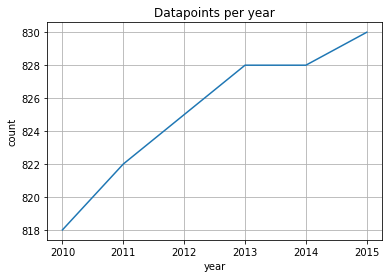

In [11]:
# Explore distribution of observations vs year

df_years_of_data = pd.DataFrame(columns=['year', 'count'])

for year in list(raw_census_df['year'].unique()):
    count = len(raw_census_df[raw_census_df['year'] == year][['county name', 'state']])
    df_years_of_data = df_years_of_data.append({'year':year, 'count':count}, ignore_index=True)

df_years_of_data = df_years_of_data.apply(pd.to_numeric)
sns.lineplot(data=df_years_of_data, x='year', y='count')
plt.grid()
plt.title('Datapoints per year')



In [12]:
# Surface the "county name" and "state" of counties consisting of data from only one year (2015)
data_year_2015 = raw_census_df[raw_census_df['year'] == 2015][['county name', 'state']]
data_year_2014 = raw_census_df[raw_census_df['year'] == 2014][['county name', 'state']]

pd.concat([data_year_2015, data_year_2014]).drop_duplicates(keep=False)

,county name,state
4342,Broomfield County,Colorado
4910,Athens County,Ohio


In [13]:
# Return all counties with 6 years of data

six_years = raw_census_df.groupby(['county name', 'state'])['year'].count() == 6
six_years[six_years].reset_index()

,county name,state,year
0,Ada County,Idaho,True
1,Adams County,Colorado,True
2,Adams County,Illinois,True
3,Adams County,Pennsylvania,True
4,Aiken County,South Carolina,True
...,...,...,...
813,York County,Pennsylvania,True
814,York County,South Carolina,True
815,York County,Virginia,True
816,Yuba County,California,True


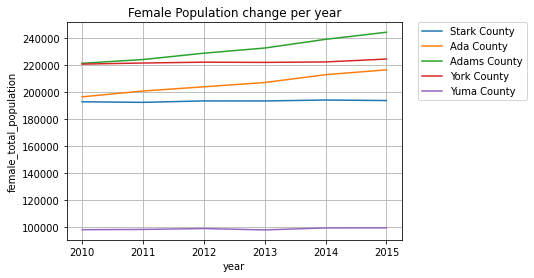

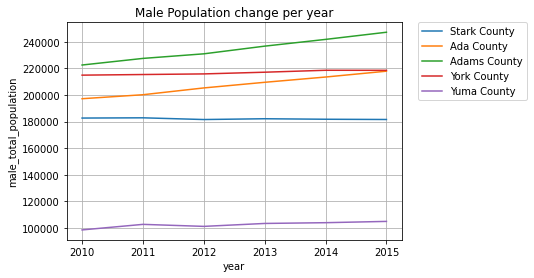

In [14]:
# Visualize population change in 5 random counties with 6 years of data

random_county_states = [
    ('Stark County', 'Ohio'), 
    ('Ada County', 'Idaho'), 
    ('Adams County', 'Colorado'), 
    ('York County', 'Pennsylvania'), 
    ('Yuma County', 'Arizona')
]

sample_raw_census_df = pd.DataFrame()

for county_name, state in random_county_states:
    tmp = raw_census_df.loc[(raw_census_df['county name'] == county_name) & (raw_census_df['state'] == state)]
    sample_raw_census_df = sample_raw_census_df.append(tmp, ignore_index=True)


sns.lineplot(data=sample_raw_census_df, x='year', y='female_total_population', hue='county name')
plt.grid()
plt.title('Female Population change per year')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.figure()

sns.lineplot(data=sample_raw_census_df, x='year', y='male_total_population', hue='county name')
plt.grid()
plt.title('Male Population change per year')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## What we know so far:
- Various counties share the same names across states. Therefore, a single observation should be identified by the combination of `county name` and `state`.
- There are a set of null values for `county_population_increased_2015_2016` belonging to "Pike County, Kentucky".
- Not all `county name` + `state` combinations have the same number of years of data.
- All but two `county name` + `state` combinations have two or more years of data.
- Potential solution: compute rate of change of population fields for each `county name` + `state` over time as features. Change in population fields are normalized by time (`year`).

## How to proceed:
- Drop null rows from `raw_census_df` ("Pike County, Kentucky")
- Drop `county name` + `state` rows that contain only one year of data ("Broomfield County, Colorado" and "Athens County, Ohio")
- Normalize change in values in population fields by elapsed time in years.

In [15]:
tmp_df = raw_census_df.dropna()
is_broomfield_county_colorado = (tmp_df['county name'] == 'Broomfield County') & (tmp_df['state'] == 'Colorado')
is_athens_county_ohio = (tmp_df['county name'] == 'Athens County') & (tmp_df['state'] == 'Ohio')
tmp_df.drop(tmp_df.loc[is_broomfield_county_colorado].index, inplace = True)
tmp_df.drop(tmp_df.loc[is_athens_county_ohio].index, inplace = True)
tmp_df

/home/jimmy/.cache/pypoetry/virtualenvs/nielsen-interview-project-k9tJTFJ4-py3.8/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,county name,state,county_population_increased_2015_2016,year,female_total_population,female_age_under_5_pct,female_age_5_to_9_pct,female_age_10_to_14_pct,female_age_15_to_19_pct,female_age_20_to_24_pct,...,male_age_40_to_44_pct,male_age_45_to_49_pct,male_age_50_to_54_pct,male_age_55_to_59_pct,male_age_60_to_64_pct,male_age_65_to_69_pct,male_age_70_to_74_pct,male_age_75_to_79_pct,male_age_80_to_84_pct,male_age_85_and_over_pct
0,Stark County,Ohio,False,2010,192651,5.5,6.3,6.0,6.2,5.7,...,7.0,7.4,8.1,7.4,6.2,4.8,3.1,2.6,2.0,1.5
1,Summit County,Ohio,False,2010,279592,5.6,5.8,6.2,6.5,6.1,...,6.8,7.6,8.1,7.5,5.6,3.6,3.3,2.5,2.0,1.2
2,Trumbull County,Ohio,False,2010,108490,5.4,5.9,6.3,6.2,5.0,...,6.7,7.1,8.1,6.9,7.5,5.7,3.0,2.5,2.6,1.5
3,Tuscarawas County,Ohio,False,2010,47279,5.5,5.2,7.7,6.5,4.9,...,5.5,7.2,8.1,6.2,7.2,4.0,4.0,2.4,2.5,1.4
4,Warren County,Ohio,True,2010,105706,6.4,7.0,8.5,6.4,4.2,...,6.9,8.3,7.4,5.2,5.7,3.3,2.3,1.7,1.3,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4946,Toa Alta Municipio,Puerto Rico,False,2015,38559,4.6,6.7,5.9,6.2,8.7,...,6.9,7.3,7.2,6.2,5.0,4.8,2.4,2.8,0.6,0.7
4947,Toa Baja Municipio,Puerto Rico,False,2015,43530,4.6,7.2,4.2,6.5,6.6,...,6.8,6.3,6.3,4.8,6.2,4.6,4.7,2.4,2.0,2.0
4948,Trujillo Alto Municipio,Puerto Rico,False,2015,36804,4.4,4.9,6.5,5.7,7.1,...,7.2,6.6,6.4,4.7,6.7,5.9,3.0,2.2,2.0,1.5
4949,Bayamón Municipio,Puerto Rico,False,2015,99486,4.4,5.4,4.7,5.9,6.5,...,4.2,6.2,6.5,5.6,5.4,4.3,4.5,3.1,2.7,2.1
